# 月營收盈餘資料庫
【資料起迄】1988年至今。<br>
【資料頻率】月<br>
【資料範圍】上市、上櫃及興櫃公司<br>
參考來源：[資料庫說明](https://api.tej.com.tw/columndoc.html?subId=20)<br>

註：若使用TEJ資料庫，資料庫位置為位於「TEJ Company DB」底下的「月營收盈餘」

# 一、讀檔

1. 引入套件<br>
我們使用pandas套件協助excel資料讀取為表格。<br>
<code>import pandas as pd</code>表示引入(import)套件「pandas」為(as)名稱pd，意即我將套件引入的同時為他重新簡稱為pd，為方便後面呼叫到此套件時可以簡單稱呼他。

In [2]:
import pandas as pd

FileNotFoundError: ignored

2. 資料讀取<br>
使用程式<code>pd.read_csv("檔案路徑與檔名.csv")</code>可以將csv檔案讀取為表格<br>
注意此程式是針對csv檔案，若為活頁簿檔案類型(.xlsx)則使用pd.read_excel()，有不同適用的function。<br>
注意若該csv檔案與此程式檔位於同一路徑下，可直接填寫檔名，無需附上檔案路徑，也就是說此處的檔案路徑為相對路徑。

In [22]:
# 由於我將目標檔案「月營收盈餘.csv」儲存於同此程式檔案路徑的資料夾「to_student」底下，我只需撰寫相對路徑to_student/月營收盈餘.csv
# 別忘記請依照自己存放檔案的相對路徑改寫此處！！

Rev = pd.read_csv("../月營收盈餘.csv") # 此處我將讀取出來的表格命名為Rev

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
# 得知檔案「形狀」：(列數,欄數)

Rev.shape

(107244, 14)

In [ ]:
Rev.head()  # 迅速檢視前五筆資料（注意：python都是由0起算，可以從最左邊粗體的數字發現，最上面一列是第0列）

,公司,年月,營收發布日,單月營收(千元),去年單月營收(千元),單月營收成長率％,單月營收與上月比％,累計營收(千元),合併單月營收(千元),合併去年單月營收(千元),合併單月營收成長率％,合併單月營收與上月比％,合併單月營收與上月比％-成長月數,合併累計營收(千元)
0,1101 台泥,1989-12-28,NaN,1258546.0,1185362.0,6.17,2.44,13374168.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1102 亞泥,1989-12-28,NaN,909338.0,794423.0,14.47,4.08,9360840.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1103 嘉泥,1989-12-28,NaN,311527.0,318585.0,-2.22,-0.77,3412231.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1104 環泥,1989-12-28,NaN,272811.0,235149.0,16.02,7.28,2710178.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1108 幸福,1989-12-28,NaN,233001.0,NaN,NaN,15.84,2591629.0,NaN,NaN,NaN,NaN,NaN,NaN


# 二、了解各個欄位的資料型態(dtype)
目的：了解各個欄位的資料型態可以方便我們使用資料，比如若想對某個欄位做計算，該欄位型態必須是數值才行。<br>
方法：對資料表Rev後方加上<code>.dtypes</code><br>
> object：該欄位的內容都是字串(string)，也就是文字的意思。<br>
float64：該欄位的內容都是64位元的浮點數(float)，可以理解成能儲存多位小數的數字型態，也就是個數值的意思。

In [ ]:
Rev.dtypes

公司                   object
年月                   object
營收發布日                object
單月營收(千元)            float64
去年單月營收(千元)          float64
單月營收成長率％            float64
單月營收與上月比％           float64
累計營收(千元)            float64
合併單月營收(千元)          float64
合併去年單月營收(千元)        float64
合併單月營收成長率％          float64
合併單月營收與上月比％         float64
合併單月營收與上月比％-成長月數    float64
合併累計營收(千元)          float64
dtype: object

# 三、修改為時間型態(datetime)
從上面結果可以發現「年月」是一種字串，此處我們欲將其改為時間格式，更方便後面的資料分析。<br>
(以下按照步驟說明)
1. 呼叫欲修改格式的資料<br>
對資料表Rev呼叫「年月」這個欄位的所有內容，使用程式<code>Rev['年月']</code>即可。<br>

2. 指定年月日格式
使用以下程式：<br>
<code>pd.to_datetime(欲更改的資料,format = "欲更改格式")</code><br>
可以幫助我們把Rev['年月']改成我們希望的格式，此處以"%Y-%m-%d"示範，表示希望它呈現為「年-月-日」<br>

3. 僅保留年月（不顯示日期）<br>
又我們只需要保留年月即可，因為我們是月資料，不需要日期，所以在後面添加<code>.dt.to_period('M')</code><br>
也就是指定該內容只需要保留到'M'(Month月份的意思)。<br>
因此整句寫法為：<br>
<code>pd.to_datetime(Rev['年月'],format = "%Y-%m-%d").dt.to_period('M')</code>

4. 覆蓋原本內容<br>
最後，將剛剛更改完畢的格式，指定回原本的<code>Rev['年月']</code>。<br>
因此下方完整寫法為：<br>
<code>Rev["年月"] = pd.to_datetime(Rev['年月'],format = "%Y-%m-%d").dt.to_period('M')</code><br>
(註：在python當中，可以把等號視為assign的意思，是把等號右方的東西assign到左方的東西，如<code>a=3</code>是指對a賦予3這個值的意思。)

In [ ]:
Rev["年月"] = pd.to_datetime(Rev['年月'],format="%Y-%m-%d").dt.to_period('M')

# 四、2011/1至2020/12都有月營收的公司
接下來繪製的目標區間，是2011/1至2020/12，我們希望探討在此區間都存在的公司。<br>
參考來源：[邏輯符號說明](https://killer0001.blogspot.com/2018/10/python-tips-and-or.html)

In [ ]:
# 篩選2011/1~2020/12的資料: 是雙重條件，要同時符合年月>2011/1且年月<2020/12。 & 用來表示「且」的意思。
# 將篩選結果命名為select_1120，並且快速查看前五筆

select_1120 = Rev[(Rev["年月"]>=pd.Period("2011-1","M")) & (Rev["年月"]<=pd.Period("2020-12","M"))]
select_1120.head()

,公司,年月,營收發布日,單月營收(千元),去年單月營收(千元),單月營收成長率％,單月營收與上月比％,累計營收(千元),合併單月營收(千元),合併去年單月營收(千元),合併單月營收成長率％,合併單月營收與上月比％,合併單月營收與上月比％-成長月數,合併累計營收(千元)
201638,1101 台泥,2011-12,NaN,2072570.0,2171125.0,-4.54,3.57,24050722.0,10191578.0,NaN,NaN,1.73,1.0,118496562.0
201639,1102 亞泥,2011-12,NaN,1006050.0,1051182.0,-4.29,5.67,10868073.0,NaN,NaN,NaN,NaN,NaN,NaN
201640,1103 嘉泥,2011-12,NaN,84001.0,203489.0,-58.72,13.71,877339.0,NaN,NaN,NaN,NaN,NaN,NaN
201641,1104 環泥,2011-12,NaN,305778.0,321858.0,-5.00,17.21,3325422.0,NaN,NaN,NaN,NaN,NaN,NaN
201642,1108 幸福,2011-12,NaN,273250.0,255518.0,6.94,10.38,3195259.0,NaN,NaN,NaN,NaN,NaN,NaN


## pivot技巧：將資料展開成為兩個維度
此時我們利用pivot將資料重新排列！<br>
因為我們希望探討的是月營收，但是每一筆月營收有主要兩個維度的資料，也就是「年月」、「公司」，因此我們希望「年月」可以是新表格的欄位(columns)、希望「公司」是新表格的列名(index)，而表格數值為月營收(單月營收(千元))，因此使用程式：<br>
<code>資料表.pivot(index='公司', columns='年月', values='單月營收(千元)')</code><br>
## dropna技巧：將資料排除缺失值(NA)
接著，因為我們希望留下在2011-1至2020-12都有資料的公司，也就是說，在以上創造出的表格中，如果每一列(公司別)有出現NA，就刪掉該列(公司)，
也就是刪除擁有NA的列(公司)，因此此處採用程式：<br>
<code>資料表.dropna(axis = 0)</code><br>
**axis = 0** 可以表達刪除擁有NA的列(公司)，而 **axis = 1** 則代表刪除擁有NA的欄(年月)，要注意不同喔！

In [ ]:
# 綜合上述兩個技巧，將資料重整，使「年月」為欄、「公司」為列、「單月營收(千元)」為值，且刪除包含缺值的列。
# 命名此結果表為final_select，並快速查看前五筆

final_select = select_1120.pivot(index='公司', columns='年月', values='單月營收(千元)').dropna(axis = 0)
final_select.head()

年月,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
公司,,,,,,,,,,,,,,,,,,,,,
1101 台泥,2337946.0,1411427.0,2085036.0,2137908.0,1969578.0,2041524.0,1947777.0,1984646.0,1994169.0,2066932.0,...,9473250.0,10216799.0,10285516.0,9961312.0,10178622.0,9885013.0,9745147.0,10293900.0,10889658.0,10933035.0
1102 亞泥,870505.0,657640.0,903106.0,926706.0,853139.0,867762.0,1000629.0,871181.0,1027035.0,932265.0,...,5077457.0,6751585.0,7182969.0,6752208.0,6798878.0,6683133.0,7256519.0,7433331.0,7923604.0,8320877.0
1103 嘉泥,186073.0,93848.0,150432.0,89735.0,53645.0,26530.0,21754.0,21831.0,23969.0,51646.0,...,179493.0,158812.0,171405.0,166768.0,173129.0,152585.0,163492.0,165638.0,208929.0,200989.0
1104 環泥,326488.0,194335.0,318716.0,286879.0,260462.0,272765.0,259270.0,270906.0,284425.0,284510.0,...,479717.0,481205.0,403105.0,453562.0,477040.0,366990.0,450890.0,495885.0,488513.0,555150.0
1108 幸福,290613.0,164703.0,282921.0,316469.0,256817.0,241100.0,276115.0,285623.0,288899.0,271197.0,...,418037.0,404198.0,357162.0,360616.0,384035.0,366847.0,380768.0,381651.0,402129.0,388124.0


此時，<code>final_select.index</code>表示在2011/1~2020/12都沒有缺值的公司，符合我們這第四大點的需求！

In [ ]:
final_select.index

Index(['1101 台泥', '1102 亞泥', '1103 嘉泥', '1104 環泥', '1108 幸福', '1109 信大',
       '1110 東泥', '1201 味全', '1203 味王', '1210 大成',
       ...
       '9944 新麗', '9945 潤泰新', '9946 三發地產', '9949 琉園', '9950 萬國通', '9951 皇田',
       '9955 佳龍', '9958 世紀鋼', '9960 邁達康', '9962 有益'],
      dtype='object', name='公司', length=1404)

In [ ]:
# 簡單印出結果，利用 len(內容) 可查看內容長度

print("在2011/1~2020/12都有月營收的公司總共",len(final_select.index),"間")

在2011/1~2020/12都有月營收的公司總共 1404 間


# 五、電信及IDC
接著，我們特別查看TEJ產業中，子產業名為「M23K3 電信及IDC」的公司！已知2021年TEJ子產業名為M23K3 電信及IDC的公司現有此五間：

公司|TEJ產業名|TEJ子產業名
--|--|--
2412 中華電|M23K 通訊設備|M23K3 電信及IDC
3045 台灣大|M23K 通訊設備|M23K3 電信及IDC
4904 遠傳|M23K 通訊設備|M23K3 電信及IDC
3682 亞太電|M23K 通訊設備|M23K3 電信及IDC
6561 是方|M23K 通訊設備|M23K3 電信及IDC

## isin技巧：篩選資料
程式<code>資料A.isin(資料B)</code>可以幫助回傳該資料A中的每一個元素，是否存在於資料B中，會呈現為True/False。<br>
如欲查看pd.Series([1,5,2])當中的元素有沒有在特定資料[1,2]當中，則pd.Series([1,5,2]).isin([1,2])回傳結果為:<br>
<center>0     True<br>
1    False<br>
2     True<br>
dtype: bool</center><br>

**＊注意：但此技巧僅適用於「資料A」的格式是屬於pandas的物件時** <br>
此處因為final_select.index的資料型態為pandas.core.indexes.base.Index，是屬於pandas的物件，<br>
我們用<code>final_select.index.isin(想要的公司)</code>能回傳final_select.index每個元素是否存在於想要的公司中的True/ False值。<br>
<br>
接著，我們直接使用<code>final_select[final_select.index.isin(想要的公司)]</code>，僅會回傳出`final_select.index.isin(想要的公司)`當中為True的元素，也就是篩選出我們想要的公司的意思。<br>
註：我們可以透過<code>type(資料)</code>了解資料的類型

In [ ]:
# 依照上述說明，篩選出想討論的公司：

final_select[final_select.index.isin(["2412 中華電","3045 台灣大","4904 遠傳","3682 亞太電","6561 是方"])]

# 註：此處沒有篩選到"6561 是方"，因為該公司在dropna那一關被踢除了。

年月,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
公司,,,,,,,,,,,,,,,,,,,,,
2412 中華電,16205597.0,16035621.0,15342942.0,16017661.0,15580335.0,16350496.0,15962745.0,17323629.0,15754746.0,15791082.0,...,15575267.0,15717512.0,16110489.0,15979863.0,16296592.0,17002235.0,18872533.0,16708044.0,18184893.0,24590681.0
3045 台灣大,5102956.0,4861185.0,5288579.0,4936738.0,5069330.0,5044501.0,5145180.0,5211625.0,5110168.0,5198494.0,...,10502539.0,9910400.0,10819041.0,10612198.0,10385701.0,10662570.0,10194706.0,10434304.0,15268849.0,12720536.0
3682 亞太電,2089193.0,1994088.0,2011240.0,1983396.0,2033517.0,2107916.0,2148411.0,2195924.0,2224414.0,2168461.0,...,1147302.0,1113262.0,1137170.0,1195617.0,1094361.0,1100782.0,1048167.0,991846.0,1113537.0,1416743.0
4904 遠傳,5068673.0,4565946.0,5125368.0,4912255.0,5124994.0,5075222.0,5419358.0,5359870.0,5265329.0,5232633.0,...,6340336.0,6140824.0,6370749.0,6163166.0,6275774.0,6395138.0,5959157.0,6675780.0,8006731.0,8124806.0


## 平減
對每個公司而言，因為規模不同，其月營收本來就會有明顯不同差異，為了消除這樣的差異，讓結果看上去更加「公平」，我們有時會採用平減(deflating)的方式呈現資料，而平減方式有很多種，此處我們將每個公司的各個月份的營收除以自己公司2015/12的月營收。

* **資料表.apply(公式A,axis = 1)**<br>
針對資料中每一列統一執行公式A

* **lambda**<br>
lambda是function的一種簡寫法。<br>
寫成<code>lambda input:output</code>。lambda後面會接著function的input，:後方會接function的output。 <br>
>**舉例說明：**<br>
><code>lambda x:2*x+3 </code>表示一個將x乘以2再加3的function，<br>
>命名此function為linear：<br>
><code>linear = lambda x:2*x+3</code><br>
>呼叫此fuction，嘗試帶入x = 5：<br>
  `linear(5)`<br>
所得結果為13。


In [ ]:
# 這裡我們將上一格所做內容命名為M23K3。接著，我們針對原始資料M23K3裡的每一間公司去除以各自2015/12的月營收，重新命名資料為deflate

M23K3 = final_select[final_select.index.isin(["2412 中華電","3045 台灣大","4904 遠傳","3682 亞太電","6561 是方"])]
deflate = M23K3.apply(lambda x:x/x["2015-12"],axis = 1)
deflate

年月,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,...,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12
公司,,,,,,,,,,,,,,,,,,,,,
2412 中華電,0.767900,0.759846,0.727024,0.758995,0.738272,0.774766,0.756393,0.820878,0.746537,0.748259,...,0.738032,0.744772,0.763394,0.757204,0.772212,0.805649,0.894273,0.791709,0.861689,1.165227
3045 台灣大,0.513690,0.489352,0.532375,0.496957,0.510305,0.507805,0.517940,0.524629,0.514416,0.523307,...,1.057239,0.997631,1.089100,1.068278,1.045478,1.073349,1.026251,1.050370,1.537040,1.280514
3682 亞太電,1.793390,1.711750,1.726474,1.702572,1.745597,1.809462,1.844223,1.885009,1.909465,1.861434,...,0.984858,0.955638,0.976161,1.026333,0.939413,0.944925,0.899760,0.851413,0.955874,1.216150
4904 遠傳,0.601571,0.541905,0.608299,0.583006,0.608255,0.602348,0.643191,0.636131,0.624911,0.621030,...,0.752497,0.728818,0.756106,0.731470,0.744834,0.759001,0.707257,0.792309,0.950271,0.964285


# 六、敘述統計
針對原始資料和平減後的資料進行敘述統計。<br>
利用`資料集.describe()`可以了解敘述統計量。<br>
其中有參數`percentiles`可以指定百分位數。<br>
而`資料集.describe(percentiles=[.25,.5,.75])`是default的三個百分位數。
* 注意：資料表需不需要轉置？<br>
`資料集.describe()`是針對資料集各個欄去做敘述統計，但是此處我們是希望對列（即公司）進行敘述統計，所以這裡要先把資料轉個方向，也就是類似矩陣轉置的概念，將欄列的位置對調！
<br>透過程式`資料表.T`就可以做到
* tips：數字表現方式？<br>
因為數字龐大，pandas會自動將數字顯示為科學符號，如果希望整個表格的數字指定為小數後x位，可以運用`pd.options.display.float_format = '{:.xf}'.format`以指定。<br>
註：這個設定是「全域」的，即我只要指定一次，往後所有表格都是符合這樣的格式。

In [ ]:
# 以下示範所有數字顯示到小數後第3位

pd.options.display.float_format = '{:.3f}'.format

# 若要回覆原始的科學符號表示，使用pd.reset_option("display.float_format")即可

In [ ]:
# 原始資料敘述統計（示範：1%、10%、15%、25%、50%、75%、90%、95%、99%）

M23K3.T.describe([.01,.1,.15,.25,.5,.75,.9,.95,.99])

公司,2412 中華電,3045 台灣大,3682 亞太電,4904 遠傳
count,120.000,120.000,120.000,120.000
mean,17984618.075,8975583.317,1440239.583,7096748.000
std,1643528.887,1986195.539,392105.915,973892.263
min,15266518.000,4861185.000,991846.000,4565946.000
1%,15357000.290,4957212.970,1045519.920,4941974.420
10%,15722829.200,5335595.700,1107289.900,5713293.700
15%,15977295.300,5643483.750,1119985.950,5953660.250
25%,16694180.500,8890330.250,1155773.750,6389040.750
50%,18238097.500,9468320.500,1255036.000,7298351.500
75%,18958885.500,10045475.000,1748283.000,7753255.000


In [ ]:
# 平減資料敘述統計（示範：10%、15%、25%、50%、75%、90%、95%）

deflate.T.describe([.01,.1,.15,.25,.5,.75,.9,.95,.99])

公司,2412 中華電,3045 台灣大,3682 亞太電,4904 遠傳
count,120.000,120.000,120.000,120.000
mean,0.852,0.904,1.236,0.842
std,0.078,0.200,0.337,0.116
min,0.723,0.489,0.851,0.542
1%,0.728,0.499,0.897,0.587
10%,0.745,0.537,0.951,0.678
15%,0.757,0.568,0.961,0.707
25%,0.791,0.895,0.992,0.758
50%,0.864,0.953,1.077,0.866
75%,0.898,1.011,1.501,0.920


# 七、畫圖
針對原始資料和平減後的資料畫圖。<br>
1. import畫圖套件<br>
<code>import matplotlib.pyplot as plt</code>的意義為：import套件matplotlib.pyplot，並且簡稱為plt。

In [ ]:
import matplotlib.pyplot as plt

2. 處理中文字<br>
因為該套件的字體預設為英文，但是我們的繪圖內容包含公司名稱，會有中文，所以需要特別指定中文字體為繪圖字體，否則會無法顯示。<br>
首先需要找出電腦上的中文字體路徑，例如我的「黑體」路徑為/System/Library/Fonts/STHeiti Light.ttc，<br>
(若使用colab執行，就需要先把字體上傳到雲端，然後用雲端上的路徑)<br>
接著執行<br>
<code>import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/STHeiti Light.ttc'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()</code>。<br>
表示將繪圖的字體指定為我電腦上的「黑體」。

In [ ]:
import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/STHeiti Light.ttc' # 此處請自行修改為自己的中文字體路徑
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

3. 開始繪圖！首先繪製「M23K3 電信及IDC」的單月營收(千元)<br>
繪圖的概念是用每一列程式去逐步疊加對圖片的客製化設定。詳細客製化內容如下：

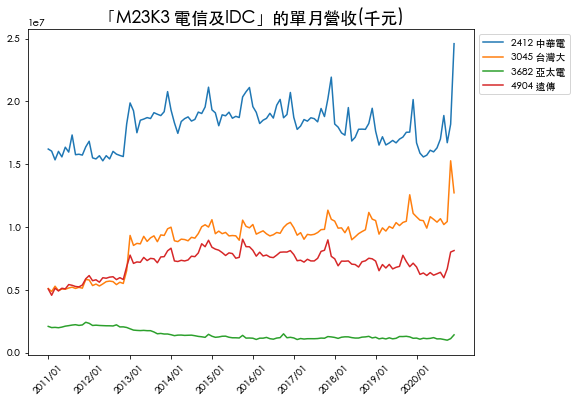

In [ ]:
# 設定圖片大小
plt.figure(figsize = (8,6)) 

# 設定標題內容，以及大小。
plt.title("「M23K3 電信及IDC」的單月營收(千元)",size = 17) 

# 資料集裡的每間公司，都畫成折線圖裡的資料線
for i in M23K3.index:                        # 針對每一間公司(M23K3.index)
    plt.plot(M23K3.loc[i].values,label = i)     # 繪製每一間公司的單月營收的折線圖，指定該折線圖在圖例裡的名稱為公司名稱
    
# 設定x軸的年月，每12筆繪製一次刻度。因為若繪出全部的刻度，會重疊太多。
plt.xticks(range(0,len(M23K3.columns),12),         # 將原始繪圖刻度，以每12筆呈現
           M23K3.columns.strftime('%Y/%m')[::12],  # M23K3.columns.strftime('%Y/%m')表示將原始欄位改成格式為年/月的字串，且以每12筆呈現
           rotation=45)                            # 將刻度旋轉45度

# 設定圖例，bbox_to_anchor=(1, 1), loc='upper left'表示該圖例的左上角(upper left)為對準整張圖片的(1,1)處，而圖片(1,1)處是指圖片右上角
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# 顯示圖片
plt.show()

4. 接著繪製「M23K3 電信及IDC」的平減後單月營收(千元)<br>
同上所述，但資料集變為deflate。

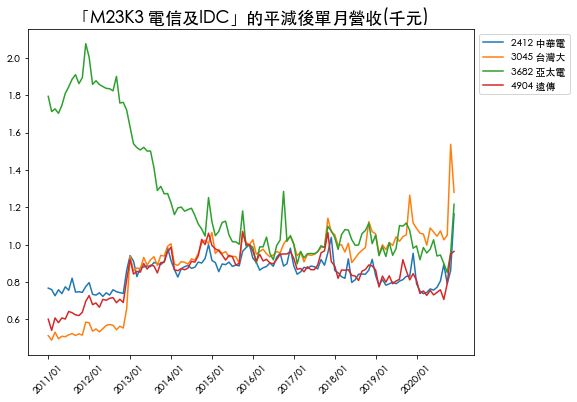

In [ ]:
plt.figure(figsize = (8,6))
plt.title("「M23K3 電信及IDC」的平減後單月營收(千元)",size = 17)
for i in deflate.index:
    plt.plot(deflate.loc[i].values,label = i)
plt.xticks(range(0,len(deflate.columns),12),deflate.columns.strftime('%Y/%m')[::12],rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

# 八、動手做做看！
請依照上述步驟，嘗試自己繪製兩張TEJ子產業為「M23G1A 晶圓代工」的單月營收(千元)折線圖！<br>
時間範圍依舊訂定為2011/1至2020/12，只需繪製該期間月營收無缺值的公司資料，<br>
繪製一張為原始資料、另一張為平減後資料，平減方式同樣是除以每間公司的2015/12的單月營收(千元)。<br>
已知2021年TEJ子產業為「M23G1A 晶圓代工」的公司如下：

公司|TEJ產業名|TEJ子產業名
--|--|--
2303 聯電|M23G 半導體|M23G1A 晶圓代工
2330 台積電|M23G 半導體|M23G1A 晶圓代工
2342 茂矽|M23G 半導體|M23G1A 晶圓代工
5347 世界|M23G 半導體|M23G1A 晶圓代工
6287 元隆|M23G 半導體|M23G1A 晶圓代工
3707 漢磊|M23G 半導體|M23G1A 晶圓代工
6770 力積電|M23G 半導體|M23G1A 晶圓代工


In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as font_manager
os.mkdir("temp")
os.chdir('../content/temp')


In [4]:
Rev = pd.read_csv("../月營收盈餘.csv") # 這邊手動上傳作業檔案到「temp」這個工作目錄

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
font_path = '../Creative.ttc' # 這邊手動上傳字體檔案到「temp」這個工作目錄
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

In [6]:
Rev["年月"] = pd.to_datetime(Rev['年月'],format="%Y-%m-%d").dt.to_period('M')

select_1120 = Rev[(Rev["年月"]>=pd.Period("2011-1","M")) & (Rev["年月"]<=pd.Period("2020-12","M"))]

final_select = select_1120.pivot(index='公司', columns='年月', values='單月營收(千元)').dropna(axis = 0)

M23G1A = final_select[final_select.index.isin(["2303 聯電","2330 台積電","2342 茂矽","5347 世界","6287 元隆", "3707 漢磊", "6770 力積電"])]

deflate = M23G1A.apply(lambda x:x/x["2015-12"],axis = 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30717 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30717 missing from current font.
  font.set_text(s, 0, flags=flags)


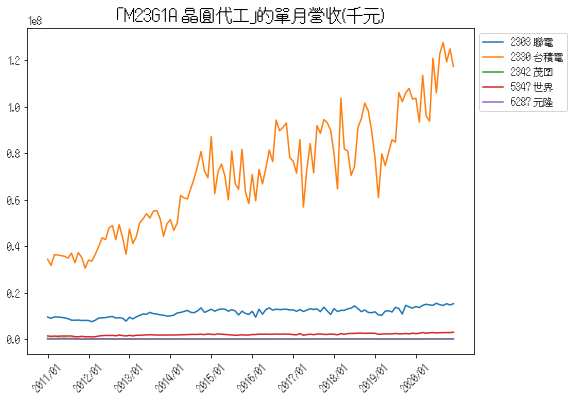

In [8]:
# 設定圖片大小
plt.figure(figsize = (8,6)) 

# 設定標題內容，以及大小。
plt.title("「M23G1A 晶圓代工」的單月營收(千元)",size = 17) 

# 資料集裡的每間公司，都畫成折線圖裡的資料線
for i in M23G1A.index:                        # 針對每一間公司(M23K3.index)
    plt.plot(M23G1A.loc[i].values,label = i)     # 繪製每一間公司的單月營收的折線圖，指定該折線圖在圖例裡的名稱為公司名稱
    
# 設定x軸的年月，每12筆繪製一次刻度。因為若繪出全部的刻度，會重疊太多。
plt.xticks(range(0,len(M23G1A.columns),12),         # 將原始繪圖刻度，以每12筆呈現
           M23G1A.columns.strftime('%Y/%m')[::12],  # M23K3.columns.strftime('%Y/%m')表示將原始欄位改成格式為年/月的字串，且以每12筆呈現
           rotation=45)                            # 將刻度旋轉45度

# 設定圖例，bbox_to_anchor=(1, 1), loc='upper left'表示該圖例的左上角(upper left)為對準整張圖片的(1,1)處，而圖片(1,1)處是指圖片右上角
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# 顯示圖片
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30717 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30717 missing from current font.
  font.set_text(s, 0, flags=flags)


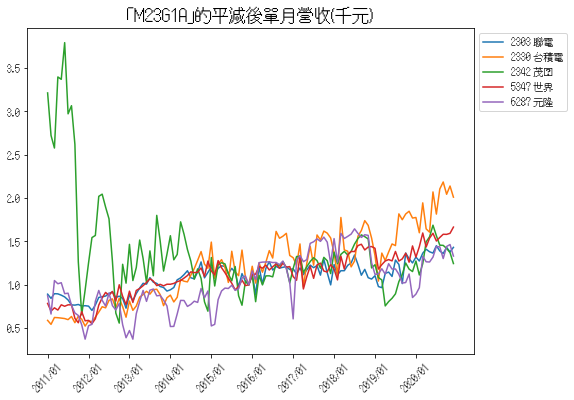

In [9]:
plt.figure(figsize = (8,6))
plt.title("「M23G1A」的平減後單月營收(千元)",size = 17)
for i in deflate.index:
    plt.plot(deflate.loc[i].values,label = i)
plt.xticks(range(0,len(deflate.columns),12),deflate.columns.strftime('%Y/%m')[::12],rotation=45)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()